In [1]:
import wug_api_data
wug_api_data.init()
wug_api_data.wug_data_clean()
wug_api_data.wug_data_features()
from wug_api_data import *

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians

In [3]:
combined_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 21 columns):
date             7673 non-null datetime64[ns]
fog              7673 non-null int64
rain             7673 non-null int64
meanwdird        7673 non-null int64
meanwindspdm     7578 non-null float64
meantempm        7546 non-null float64
meandewptm       7544 non-null float64
meanpressurem    7572 non-null float64
maxhumidity      7544 non-null float64
minhumidity      7544 non-null float64
maxtempm         7554 non-null float64
mintempm         7554 non-null float64
maxdewptm        7544 non-null float64
mindewptm        7544 non-null float64
maxpressurem     7572 non-null float64
minpressurem     7572 non-null float64
precipm          7673 non-null float64
year             7673 non-null int64
month            7673 non-null int64
day              7673 non-null int64
dayofweek        7673 non-null int64
dtypes: datetime64[ns](1), float64(13), int64(7)
memory usage: 1.2 MB


In [4]:
combined_weather_df.drop(['maxtempm', 'mintempm', 'maxdewptm', 
                          'mindewptm', 'maxpressurem', 'minpressurem', 'day', 'dayofweek'], 
                         axis=1, inplace=True)

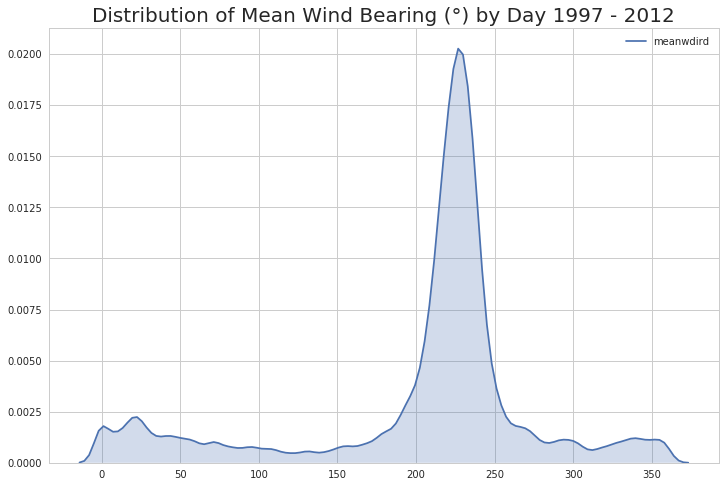

In [5]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))

sns.kdeplot(combined_weather_df['meanwdird'], shade=True)

plt.title("Distribution of Mean Wind Bearing (°) by Day {} - {}".format(year_min, year_max), 
          fontsize=20);

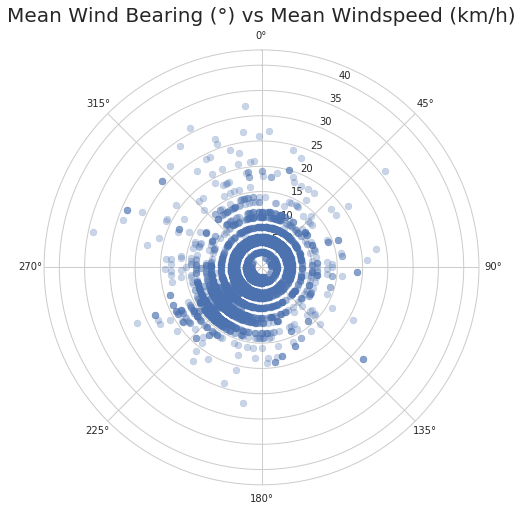

In [6]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df['meanwdird'].values], 
           y=combined_weather_df['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing (°) vs Mean Windspeed (km/h)', fontsize=20);

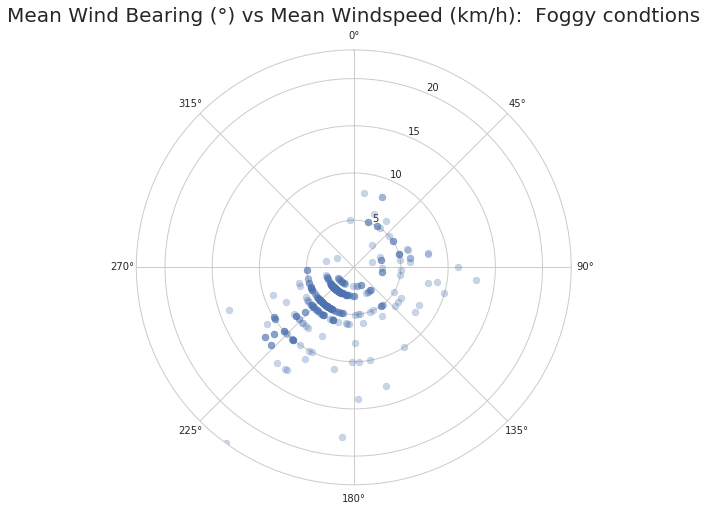

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df[combined_weather_df['fog']==1]['meanwdird'].values], 
           y=combined_weather_df[combined_weather_df['fog']==1]['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing (°) vs Mean Windspeed (km/h):  Foggy condtions', fontsize=20);

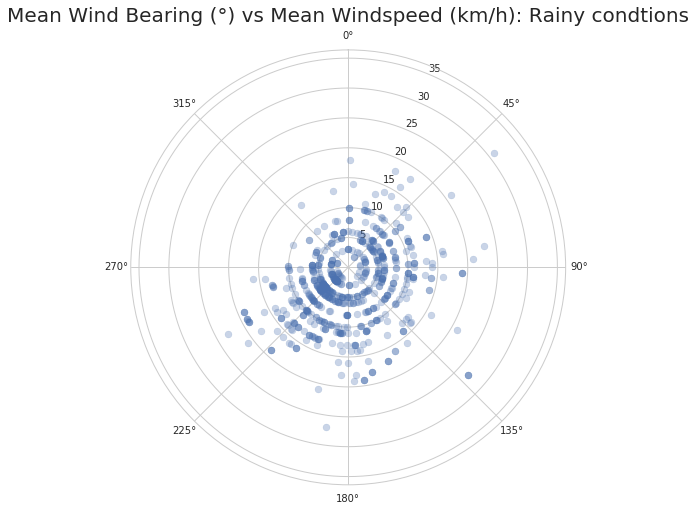

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df[combined_weather_df['rain']==1]['meanwdird'].values], 
           y=combined_weather_df[combined_weather_df['rain']==1]['meanwindspdm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Bearing (°) vs Mean Windspeed (km/h): Rainy condtions', fontsize=20);

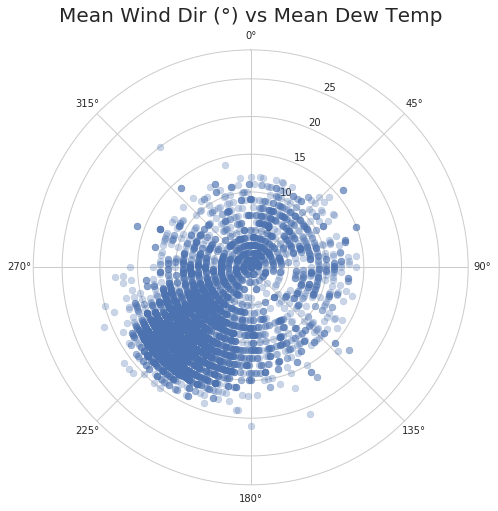

In [9]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))

ax = plt.subplot(111, polar=True)
ax.scatter(x=[radians(x) for x in combined_weather_df['meanwdird'].values], 
           y=combined_weather_df['meandewptm'], alpha=0.3)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

plt.title('Mean Wind Dir (°) vs Mean Dew Temp', fontsize=20);

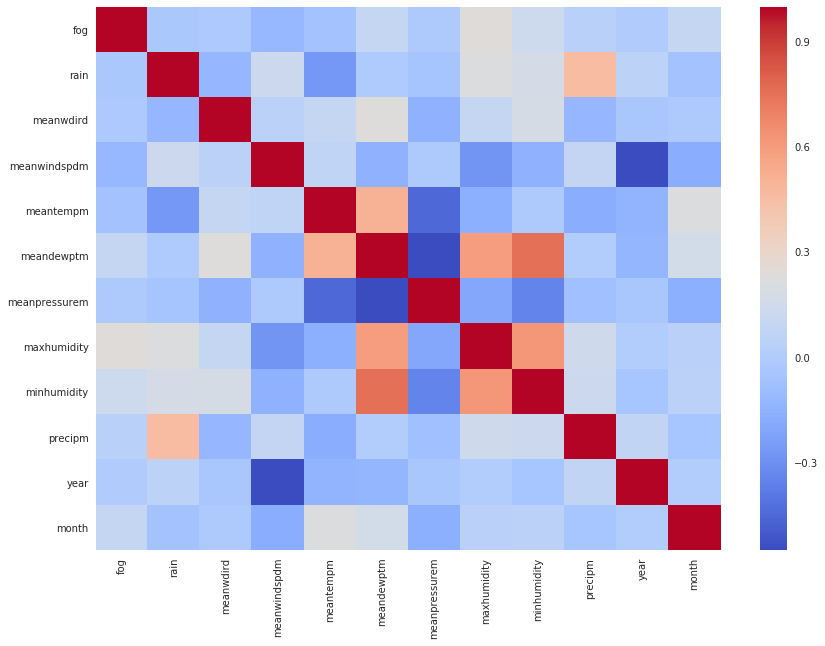

In [10]:
plt.figure(figsize=(14,10))
sns.heatmap(combined_weather_df.corr(), cmap='coolwarm')

In [19]:
x, y, c = ['meandewptm', 'meanpressurem', 'fog']

In [20]:
combined_weather_df.dropna(inplace=True)

In [21]:
x_label = combined_weather_df[x]
y_label = combined_weather_df[y]
c_label = combined_weather_df[c]

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(combined_weather_df[[x, y, c]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
kmeans.cluster_centers_

array([[ -1.16255605e+00,   1.02003914e+03,   3.36322870e-03],
       [  1.43875502e+01,   1.01264128e+03,   6.54044750e-02],
       [  6.56026600e+00,   1.01403915e+03,   2.74314214e-02],
       [  9.77977413e+00,   1.01849059e+03,   7.39219713e-02]])

In [25]:
kmeans.labels_

array([3, 1, 3, ..., 3, 3, 2], dtype=int32)

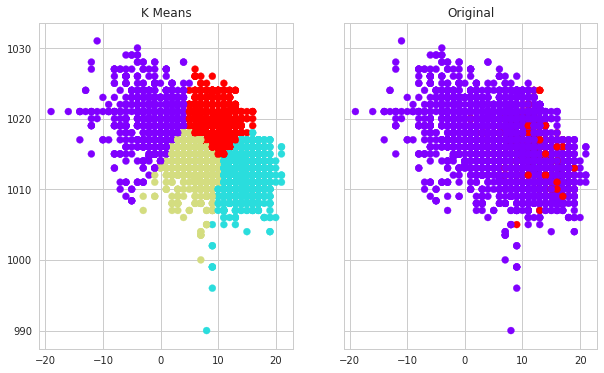

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(x_label, y_label, c=kmeans.labels_, cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(x_label, y_label, c=c_label, cmap='rainbow')